In [2]:
import sys
sys.path.insert(1, '/Users/Andrew/Documents/PhD/Scripts/Python/pygplates_rev12')
import pygplates
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.cm as cm
import mpltools
%matplotlib inline

/Users/Andrew/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
rotation_model = pygplates.RotationModel('/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Rod-Gondw_Palaeozoic_20161212.rot')
topology_features = ['/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Convergence_20161207a.gpml',
                          '/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Divergence_20161207a.gpml',
                     '/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Transform_20161207a.gpml',     
                     '/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Topologies_20161207a.gpml']

#NB can ignore transform boundaries by ommiting their loading line of code above

In [4]:
PD_rotation_model = '/Applications/GPlates-2.0.0/SampleData/FeatureCollections/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot'
PD_topology_features = ['/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz',
                        '/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz']

In [5]:
#NEOPROTEROZOIC MODEL 
#Our geological times will be from 0Ma to 'num_time_steps' Ma (inclusive) in 1 My intervals.
num_time_steps = 1000
plate_area = []
num_plates = []
# 'time' = 0, 1, 2, ... , 140
for time in range(520, num_time_steps + 5,5):

    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    resolved_topologies = []
    tmp_plate_area = []
    tmp_num_plates = []
    pygplates.resolve_topologies(topology_features, rotation_model, resolved_topologies, time)


    # We will accumulate the total area and subduction length proportion for the current 'time'.
    total_area = 0
    total_subduction_length_proportion = 0

    # Iterate over the resolved topologies.
    for resolved_topology in resolved_topologies:

        # Topological plate polygons and deforming networks have a boundary polygon with an area.
        total_area = resolved_topology.get_resolved_boundary().get_area()
    
        # The area is for a unit-length sphere so we must multiple by the Earth's radius squared.
        total_area_in_sq_kms = total_area * pygplates.Earth.mean_radius_in_kms * pygplates.Earth.mean_radius_in_kms
        
        area_log10 = np.log10(total_area_in_sq_kms)
        tmp_plate_area.append(area_log10)

    i = len(resolved_topologies)
    print i
    j = range(1,i+1)
    j_log10 = np.log10(j)
    
        
        
    tmp_plate_area.sort(reverse=True)  
    plate_area.append(tmp_plate_area)
    num_plates.append(j_log10)

    print "Done for time %dMa." % (
            time)

8
Done for time 520Ma.
9
Done for time 525Ma.
9
Done for time 530Ma.
9
Done for time 535Ma.
9
Done for time 540Ma.
10
Done for time 545Ma.
10
Done for time 550Ma.
16
Done for time 555Ma.
16
Done for time 560Ma.
16
Done for time 565Ma.
16
Done for time 570Ma.
19
Done for time 575Ma.
19
Done for time 580Ma.
20
Done for time 585Ma.
20
Done for time 590Ma.
19
Done for time 595Ma.
19
Done for time 600Ma.
17
Done for time 605Ma.
17
Done for time 610Ma.
17
Done for time 615Ma.
16
Done for time 620Ma.
15
Done for time 625Ma.
15
Done for time 630Ma.
12
Done for time 635Ma.
12
Done for time 640Ma.
14
Done for time 645Ma.
14
Done for time 650Ma.
12
Done for time 655Ma.
12
Done for time 660Ma.
12
Done for time 665Ma.
12
Done for time 670Ma.
14
Done for time 675Ma.
14
Done for time 680Ma.
14
Done for time 685Ma.
14
Done for time 690Ma.
14
Done for time 695Ma.
14
Done for time 700Ma.
10
Done for time 705Ma.
10
Done for time 710Ma.
10
Done for time 715Ma.
10
Done for time 720Ma.
9
Done for time 725Ma

In [6]:
#MATTHEWS MODEL
#NEOPROTEROZOIC MODEL 
#Our geological times will be from 0Ma to 'num_time_steps' Ma (inclusive) in 1 My intervals.
PD_num_time_steps = 410
PD_plate_area = []
PD_num_plates = []
# 'time' = 0, 1, 2, ... , 140
for time in range(0, 410 + 5,5):

    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    PD_resolved_topologies = []
    PD_tmp_plate_area = []
    pygplates.resolve_topologies(PD_topology_features, PD_rotation_model, PD_resolved_topologies, time)

    # We will accumulate the total area and subduction length proportion for the current 'time'.
    total_area = 0
    total_subduction_length_proportion = 0

    # Iterate over the resolved topologies.
    for resolved_topology in PD_resolved_topologies:

        # Topological plate polygons and deforming networks have a boundary polygon with an area.
        total_area = resolved_topology.get_resolved_boundary().get_area()
    
        # The area is for a unit-length sphere so we must multiple by the Earth's radius squared.
        total_area_in_sq_kms = total_area * pygplates.Earth.mean_radius_in_kms * pygplates.Earth.mean_radius_in_kms
        
        area_log10 = np.log10(total_area_in_sq_kms)
        PD_tmp_plate_area.append(area_log10)

    i = len(PD_resolved_topologies)
    print i
    j = range(1,i+1)
    j_log10 = np.log10(j)
    
        
        
    PD_tmp_plate_area.sort(reverse=True)  
    PD_plate_area.append(PD_tmp_plate_area)
    PD_num_plates.append(j_log10)

    print "Done for time %dMa." % (
            time)

42
Done for time 0Ma.
40
Done for time 5Ma.
35
Done for time 10Ma.
31
Done for time 15Ma.
31
Done for time 20Ma.
31
Done for time 25Ma.
35
Done for time 30Ma.
36
Done for time 35Ma.
34
Done for time 40Ma.
29
Done for time 45Ma.
25
Done for time 50Ma.
28
Done for time 55Ma.
28
Done for time 60Ma.
28
Done for time 65Ma.
29
Done for time 70Ma.
29
Done for time 75Ma.
29
Done for time 80Ma.
28
Done for time 85Ma.
25
Done for time 90Ma.
25
Done for time 95Ma.
26
Done for time 100Ma.
23
Done for time 105Ma.
23
Done for time 110Ma.
23
Done for time 115Ma.
25
Done for time 120Ma.
28
Done for time 125Ma.
29
Done for time 130Ma.
28
Done for time 135Ma.
26
Done for time 140Ma.
25
Done for time 145Ma.
22
Done for time 150Ma.
23
Done for time 155Ma.
21
Done for time 160Ma.
17
Done for time 165Ma.
17
Done for time 170Ma.
15
Done for time 175Ma.
13
Done for time 180Ma.
14
Done for time 185Ma.
14
Done for time 190Ma.
13
Done for time 195Ma.
12
Done for time 200Ma.
9
Done for time 205Ma.
9
Done for time

In [7]:
time = range(520,num_time_steps + 5,5)
PD_num_time_steps = 410
PD_time = range(0,PD_num_time_steps + 5,5)

In [8]:
cbar_tick_marks = range(520,1040,40)
PD_cbar_tick_marks = range(0,410,40)

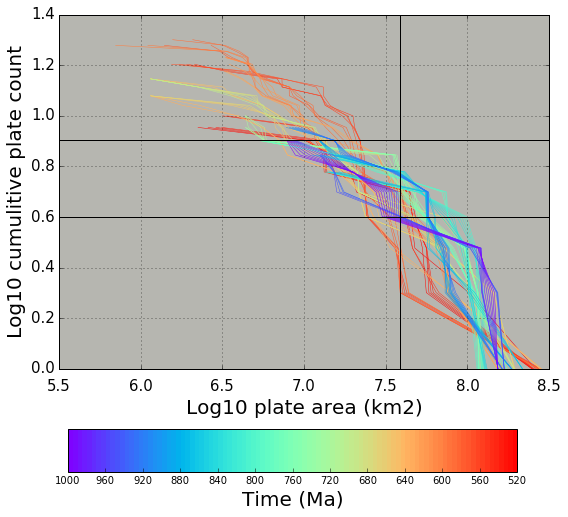

In [25]:
fig, ax = plt.subplots(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
my_cmap = cm.rainbow_r
norm = mpl.colors.Normalize(vmin=520, vmax=1000)
m = plt.cm.ScalarMappable(norm=norm, cmap=my_cmap)
Z = [[0,0],[0,0]]
CS3 = plt.contourf(Z, time, cmap=my_cmap)
for x,y,z in zip(plate_area,num_plates,time): 
    color1 = m.to_rgba(z)
    f1 = ax.plot(x,y,c=color1, linewidth=0.5)
ax.plot((7.59, 7.59), (0, 1.5), 'k-')
ax.plot((5.5, 8.5), (np.log10(4), np.log10(4)), 'k-')
ax.plot((5.5, 8.5), (np.log10(8), np.log10(8)), 'k-')
ax.set_ylim(0,1.4)
ax.set_axis_bgcolor('#b6b6b0')
ax.set_xlim(5.5,8.5)
ax.grid(True)
ax.set_xlabel('Log10 plate area (km2)', fontsize=20)
ax.set_ylabel('Log10 cumulitive plate count', fontsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15, pad=10)
cbax = fig.add_axes([0.125, -0.10, .78, 0.1])
cb = fig.colorbar(CS3, cax=cbax, orientation='horizontal')
cb.set_label('Time (Ma)', fontsize=20)
cb.set_ticks(cbar_tick_marks)
cb.ax.invert_xaxis()
plt.tight_layout()
plt.savefig('Neoproterozoic_plate_count.svg', bbox_inches='tight')


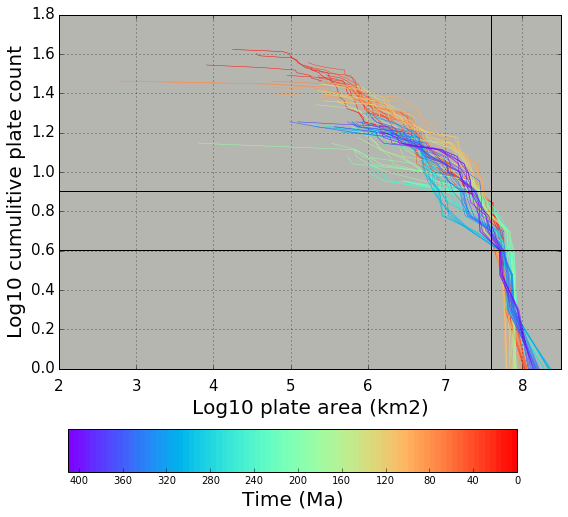

In [28]:
fig, ax = plt.subplots(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
my_cmap = cm.rainbow_r
norm = mpl.colors.Normalize(vmin=0, vmax=410)
m = plt.cm.ScalarMappable(norm=norm, cmap=my_cmap)
Z = [[0,0],[0,0]]
CS3 = plt.contourf(Z, PD_time, cmap=my_cmap)
for x,y,z in zip(PD_plate_area,PD_num_plates,PD_time): 
    color2 = m.to_rgba(z)
    f1 = ax.plot(x,y,c=color2, linewidth=0.5)
ax.plot((7.59, 7.59), (0, 1.8), 'k-')
ax.plot((2, 8.5), (np.log10(4), np.log10(4)), 'k-')
ax.plot((2, 8.5), (np.log10(8), np.log10(8)), 'k-')
ax.set_ylim(0,1.8)
ax.set_xlim(2,8.5)
ax.set_axis_bgcolor('#b6b6b0')
ax.grid(True)
ax.set_xlabel('Log10 plate area (km2)', fontsize=20)
ax.set_ylabel('Log10 cumulitive plate count', fontsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15, pad=10)
cbax = fig.add_axes([0.125, -0.10, .78, 0.1])
cb = fig.colorbar(CS3, cax=cbax, orientation='horizontal')
cb.set_label('Time (Ma)', fontsize=20)
cb.set_ticks(PD_cbar_tick_marks)
cb.ax.invert_xaxis()
plt.tight_layout()
#plt.show()
plt.savefig('Palaeozoic_plate_count.svg', bbox_inches='tight')


In [15]:
three_plates = []
four_plates = []
five_plates = []
six_plates = []
seven_plates = []
eight_plates = []
for plate in plate_area:
    three_plates.append(np.std(plate[:3]))
    four_plates.append(np.std(plate[:4]))
    five_plates.append(np.std(plate[:5]))
    six_plates.append(np.std(plate[:6]))
    seven_plates.append(np.std(plate[:7]))
    eight_plates.append(np.std(plate[:8]))

In [16]:
#figure params
axes_fontsize = 20
axis_labelsize = 20
leg_font = 15
ms = 40

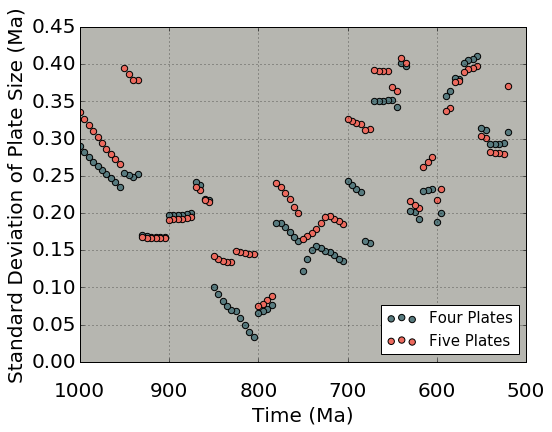

In [17]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(time, four_plates, c='#587b7f', label='Four Plates', s=ms)
ax.scatter(time, five_plates, c='#ed6a5e', label='Five Plates', s=ms)
ax.set_xlim(1000,500)
ax.set_axis_bgcolor('#b6b6b0')
ax.grid(True)
ax.set_xlabel('Time (Ma)', fontsize=axes_fontsize)
ax.set_ylabel('Standard Deviation of Plate Size (Ma)', fontsize=axes_fontsize)
ax.tick_params(axis='y',labelsize=axis_labelsize)
ax.tick_params(axis='x',labelsize=axis_labelsize, pad=20)
ax.legend(loc=4,fontsize=leg_font)
plt.savefig('Neoproterozoic_SD_plate_size.svg', bbox_inches='tight')